In [131]:
from matplotlib import pyplot as plt
# from cartopy import config
# from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline

cmap='gist_earth_r'
extent=(-5,20,10,25)
linewidth=0.001


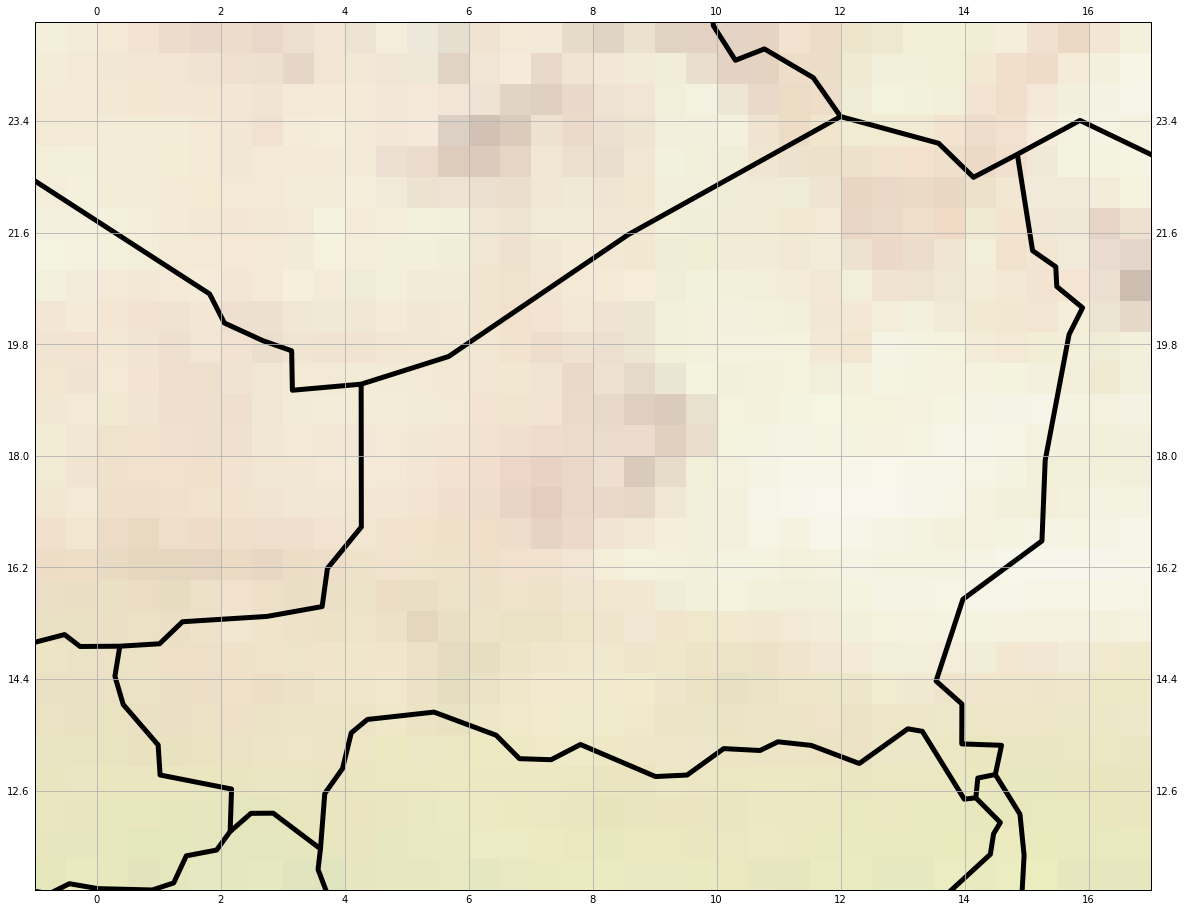

In [136]:
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)


ax.set_extent([-1,17,11.0,25]) #[-22, -15, 63, 65])

#     ax.coastlines(resolution='50m')
#    ax.lakes()# add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.stock_img()
# ax.bluemarble()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 

plt.savefig(fname='./pics/map_niger.png')

plt.show()

In [129]:
# Show different spatial resolutions

from netCDF4 import Dataset
import numpy as np 

# file of a bbox subset
AFR22 = '/home/nils/nap_niger/data/orog_AFR-22_NCC-NorESM1-M_historical_r0i0p0_GERICS-REMO2015_v1_fx_r0i0p0.nc'
AFR44 = '/home/nils/nap_niger/data/orog_AFR-44_ICHEC-EC-EARTH_rcp85_r0i0p0_CLMcom-CCLM4-8-17_v1_fx.nc'
CMIP5 = '/home/nils/nap_niger/data/orog_fx_MPI-ESM-LR_decadal2002_r0i0p0.nc'
CMIP6 = '/home/nils/nap_niger/data/orog_fx_MPI-ESM1-2-HR_ssp370_r1i1p1f1_gn.nc'

ds = Dataset(AFR22)
orog22 = ds.variables['orog'] 
lats22 = ds.variables['lat']
lons22 = ds.variables['lon']
lon22 = lons22[0,:]
lat22 = lats22[:,0]

ds = Dataset(AFR44)
orog44 = ds.variables['orog'] 
lats44 = ds.variables['lat']
lons44 = ds.variables['lon']
lon44 = lons44[0,:]
lat44 = lats44[:,0]

ds = Dataset(CMIP5)
orogC5 = ds.variables['orog'] 
latC5 = ds.variables['lat']
lonC5 = ds.variables['lon']

ds = Dataset(CMIP6)
orogC6 = ds.variables['orog'] 
latC6 = ds.variables['lat']
lonC6 = ds.variables['lon']



In [113]:

lons44, lats44 = meshgrid(lon44, lat44)
lons22, lats22 = meshgrid(lon22, lat22)

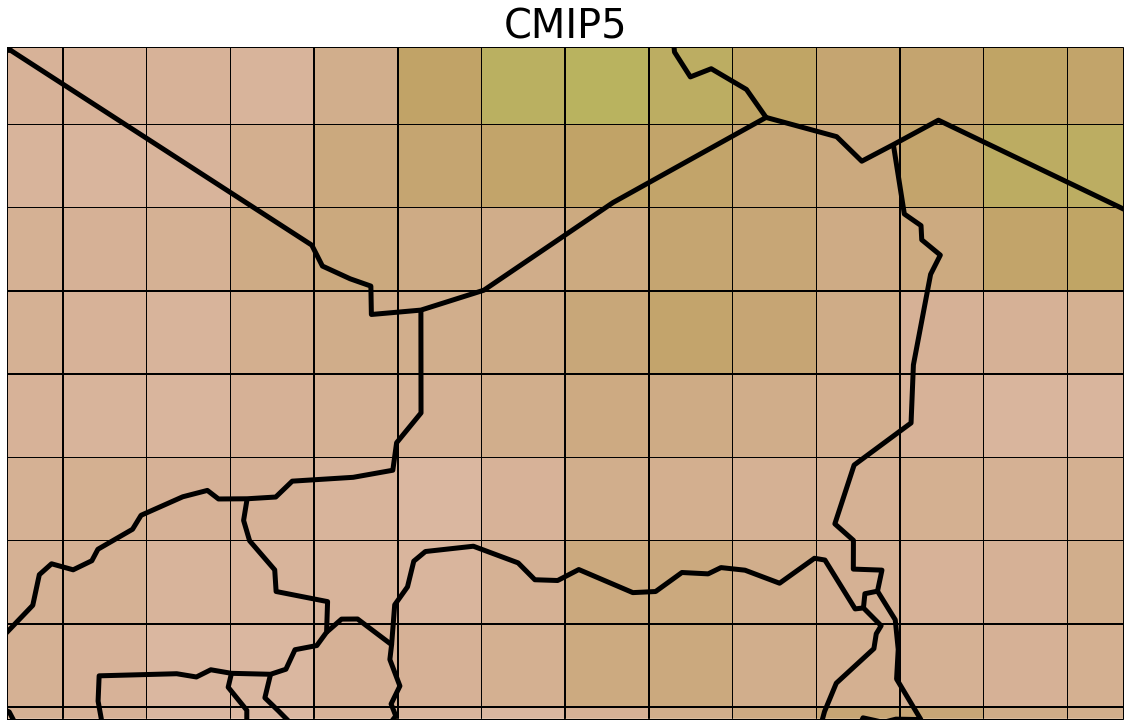

In [126]:
# fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(20,20 ), facecolor='w', edgecolor='k')
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)

# to avoid white line at meridian longitude=0
from cartopy.util import add_cyclic_point
orogC5_cy, lonC5_cy = add_cyclic_point(orogC5[:], coord=lonC5)
lonsC5, latsC5 = meshgrid(lonC5_cy, latC5)


cs = ax.pcolormesh(lonsC5, latsC5, orogC5_cy, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black', linewidth=0.5) #, vmin=0, vmax=3800)

plt.title('CMIP5', fontsize=40)

plt.savefig(fname='./pics/AFR-C5.png')



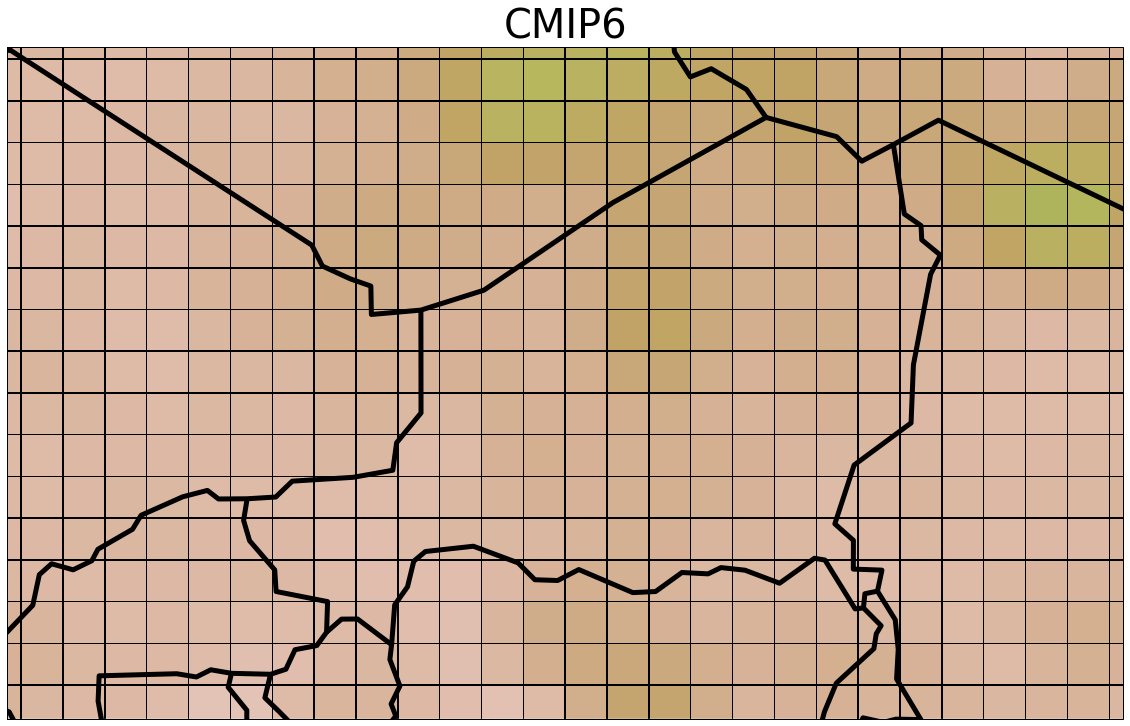

In [130]:
# fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(20,20 ), facecolor='w', edgecolor='k')
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)

# to avoid white line at meridian longitude=0
from cartopy.util import add_cyclic_point
orogC6_cy, lonC6_cy = add_cyclic_point(orogC6[:], coord=lonC6)
lonsC6, latsC6 = meshgrid(lonC6_cy, latC6)

cs = ax.pcolormesh(lonsC6, latsC6, orogC6_cy, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black', linewidth=0.5) #, vmin=0, vmax=3800)

plt.title('CMIP6', fontsize=40)

plt.savefig(fname='./pics/AFR-C6.png')


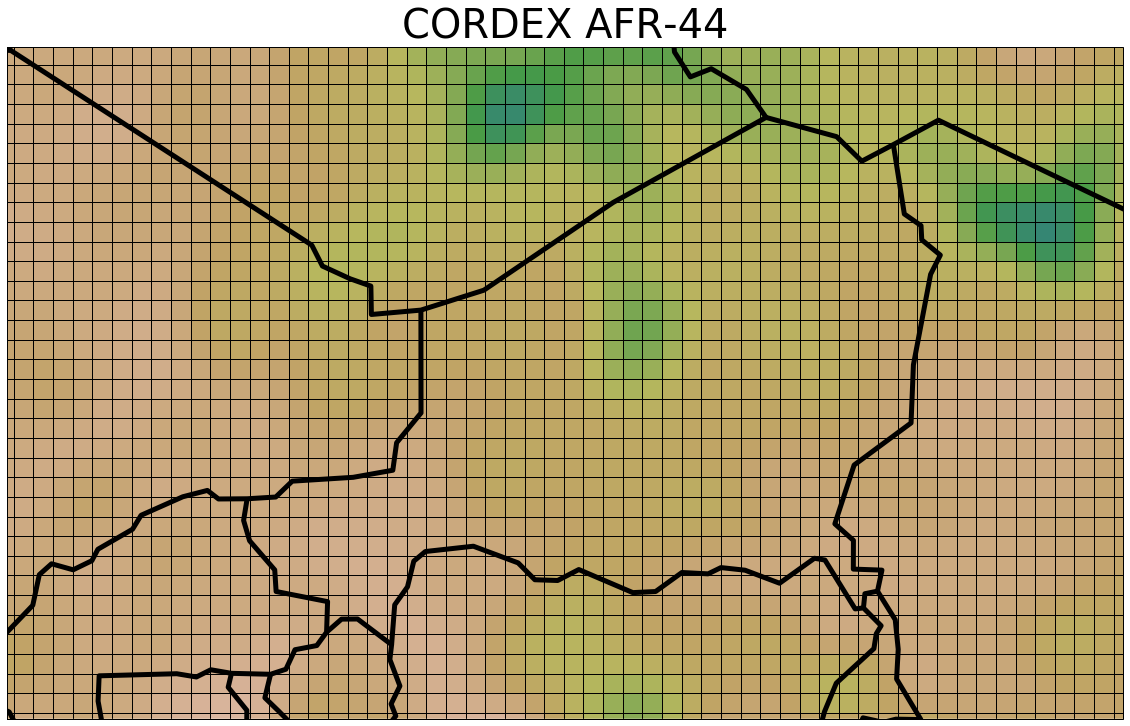

In [127]:
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)

cs = ax.pcolormesh(lons44, lats44, orog44, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black', linewidth=0.01) # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)
# cs = ax[2].pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black') # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)

# plt.colorbar(cs)cs = ax[2].pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black') # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)


plt.title('CORDEX AFR-44', fontsize=40)
plt.savefig(fname='./pics/AFR-44.png')

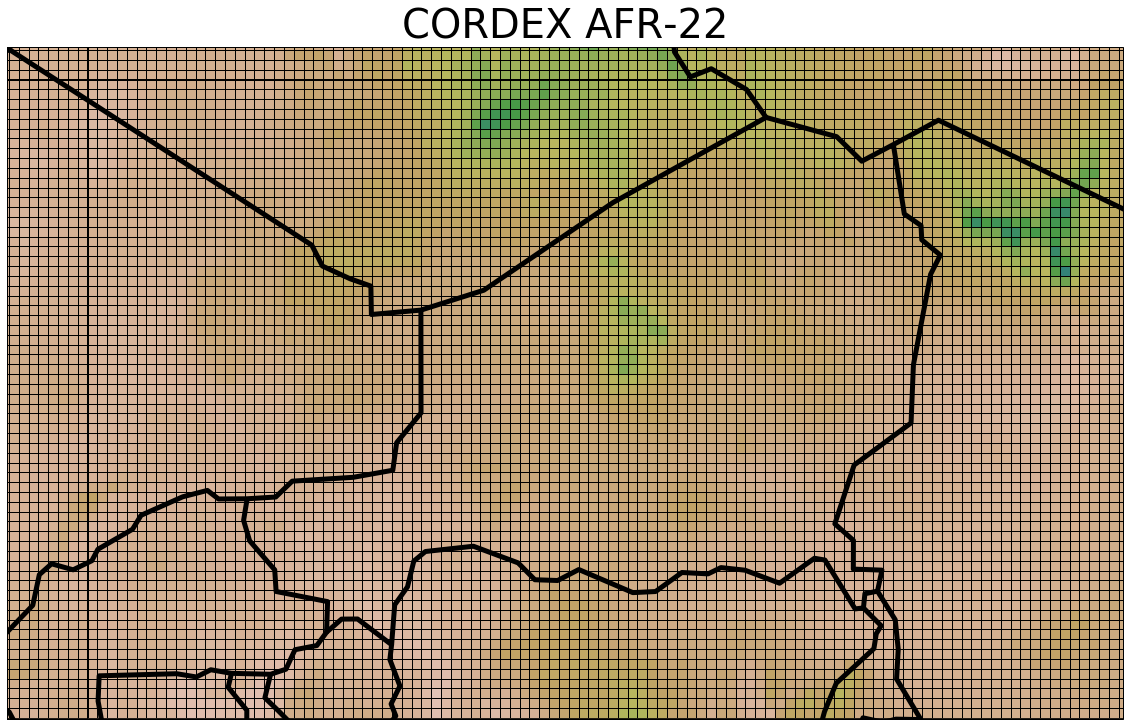

In [128]:
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)

cs = ax.pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap , edgecolor='black', linewidth=0.01) # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)
# cs = ax[2].pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black') # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)

# plt.colorbar(cs)cs = ax[2].pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap, edgecolor='black') # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# plt.colorbar(cs)

plt.title('CORDEX AFR-22', fontsize=40)
plt.savefig(fname='./pics/AFR-22.png')


In [28]:
# file of a bbox subset
# CMIP5 = '/home/nils/data/CMIP5/huss_day_HadGEM2-ES_esmControl_r1i1p1_20291201-20391130.nc'
# var = get_variable(AFR22)


# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actually not rotated)
# lon44 = lons44[0,:]
# lat44 = lats44[:,0]

# tasC5_mean = np.squeeze(np.mean(tasC5, axis=0)) # mean   30 Years 1981-2010 and transform to Celsius


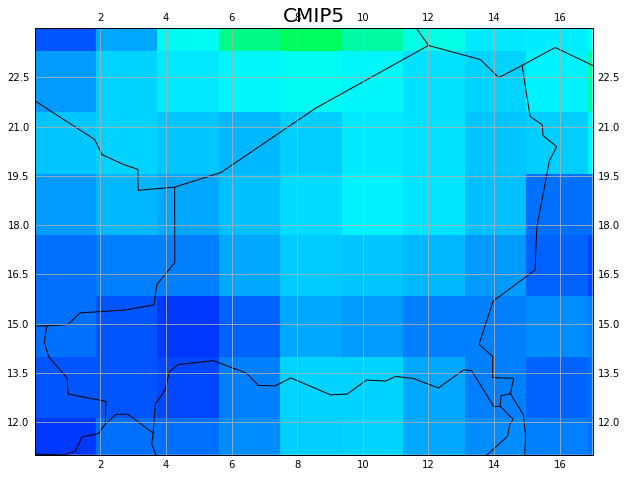

In [30]:
fig = plt.figure(figsize=(10,10 ), facecolor='w', edgecolor='k')
lonsC5, latsC5 = meshgrid(lonC5, latC5)

ax = plt.axes(projection=ccrs.PlateCarree())

extent=(0,17,11.0,24)
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('CMIP5', fontsize=20)

cs = plt.pcolormesh(lonsC5, latsC5, orogC5, transform=ccrs.PlateCarree(), cmap=cmap)
# plt.colorbar(cs)

plt.savefig(fname='./pics/CMIP5.png')